In [5]:
from preparing_script import data_processing_agrochem
import pandas as pd 
import numpy as np 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


подготовка данных из того что уже предобработанно

In [6]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия_правленная_1.csv', sep = ';') #важно сомтреть чтобы была правленная агрохимия
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)

agrochem_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина', 'повторность',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1',
       'Общий азот, %', 'Органический углерод, %']

# общий датафрейм
agrochemistry_main = agrochemistry_total[agrochemistry_total['Глубина'].isin(['0-10',"10-20"])][agrochem_columns] #можно будет добавить глубины 20-30
agrochemistry_main['GPS №'] = agrochemistry_main['GPS №'].astype(int)
agrochemistry_main.drop('повторность', axis = 1, inplace= True)
agrochemistry_main.dropna(axis = 0, inplace= True)

# разбивка по точкам на ПП
pp_points = [525,526,527,528,586,529, 584,585]
by_points = agrochemistry_main[agrochemistry_main["GPS №"].isin(pp_points)]

In [7]:
by_points

,Год,GPS №,Тип обработки,Глубина,"рН солевой вытяжки, ед. рН","рН водной вытяжки, ед. рН","Фосфор (подвижная форма), мг/кг","Калий (подвижная форма), млн-1","Общий азот, %","Органический углерод, %"
0,2021,584,ТТ,0-10,6.69,8.73,23.400000,366.273656,0.13,1.3401
1,2021,584,ТТ,10-20,6.73,8.71,21.000000,332.802456,0.13,1.2496
12,2021,584,ТТ,0-10,7.18,8.55,23.600000,339.881976,0.13,1.0681
13,2021,584,ТТ,10-20,7.20,8.58,15.400000,324.326296,0.13,1.1162
15,2021,584,ТТ,0-10,7.32,8.68,13.000000,242.478376,0.11,0.9571
...,...,...,...,...,...,...,...,...,...,...
224,2020,529,ТТ,10-20,6.87,8.33,23.563218,265.072640,0.18,1.3653
226,2020,529,ТТ,0-10,7.38,8.19,19.129721,256.452000,0.16,1.3295
227,2020,529,ТТ,10-20,7.07,8.27,18.144499,222.556992,0.16,1.3074
229,2020,529,ТТ,0-10,7.10,8.09,25.041051,279.761440,0.17,1.4097


## pH солевой вытяжки

### По обработкам

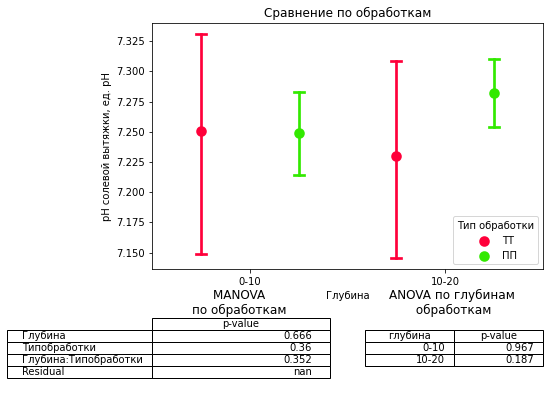

In [31]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН солевой вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/pH_сол_обработки.jpg')



In [30]:
a.empty

True

### По формам рельефа

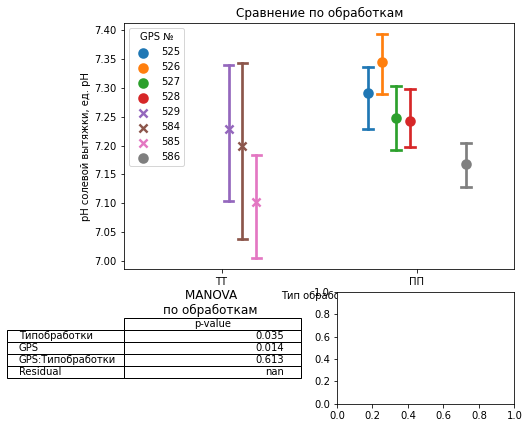

In [33]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'рН солевой вытяжки, ед. рН', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/pH_сол_рельеф.jpg')


In [34]:
stats

рН солевой вытяжки, ед. рН                    
                            mean variation       std
GPS №                                               
525                     7.292000  0.012506  0.096125
526                     7.346000  0.011761  0.091068
527                     7.248000  0.012291  0.093903
528                     7.243000  0.011319  0.086416
529                     7.228000  0.025845  0.196909
584                     7.199000  0.035466  0.269132
585                     7.101429  0.017514  0.134341
586                     7.168000  0.008929  0.067462

## pH водной вытяжки
### По обработкам

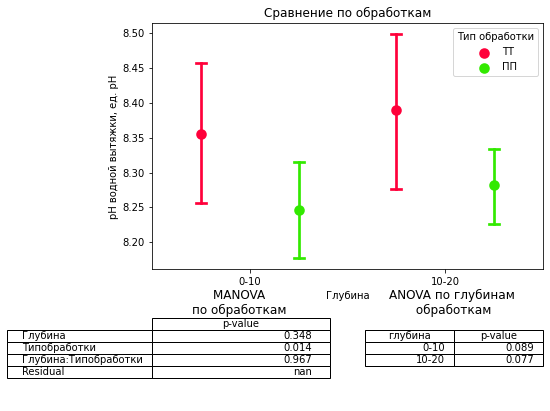

In [35]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/pH_вод_обработки.jpg')


In [36]:
stats

рН водной вытяжки, ед. рН                    
                                           mean variation       std
Тип обработки Глубина                                              
ПП            0-10                     8.245758  0.025599  0.214360
              10-20                    8.282727  0.019099  0.160649
ТТ            0-10                     8.356111  0.025807  0.221894
              10-20                    8.389524  0.032071  0.275708

### По формам рельефа

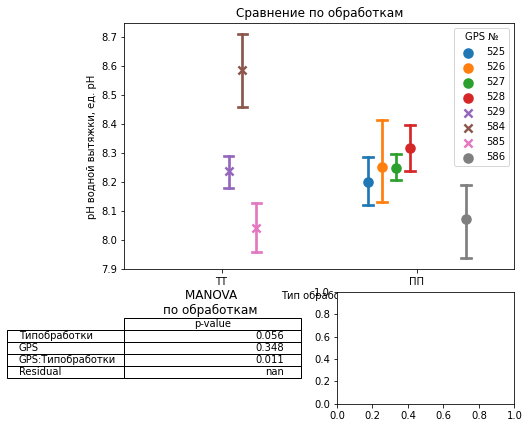

In [37]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/pH_вод_рельеф.jpg')


In [38]:
stats

рН водной вытяжки, ед. рН                    
                           mean variation       std
GPS №                                              
525                    8.200000  0.016270  0.140633
526                    8.252000  0.029574  0.257242
527                    8.251000  0.008881  0.077237
528                    8.317000  0.015361  0.134664
529                    8.238000  0.010800  0.093785
584                    8.589000  0.023999  0.217279
585                    8.041429  0.014417  0.125224
586                    8.072000  0.024218  0.206064

## Фосфор (подвижная форма), мг/кг
### По обработкам

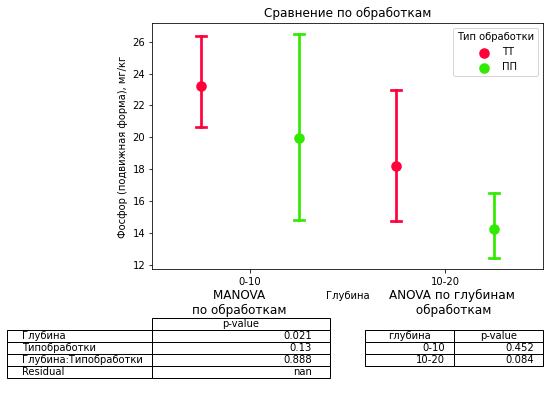

In [39]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/фосфор_обработки.jpg')


In [40]:
stats

Фосфор (подвижная форма), мг/кг                     
                                                 mean variation        std
Тип обработки Глубина                                                     
ПП            0-10                          19.982789  0.860647  17.464783
              10-20                         14.267293  0.425185   6.160291
ТТ            0-10                          23.233092  0.271366   6.487447
              10-20                         18.185711  0.548862  10.227940

### По формам рельефа

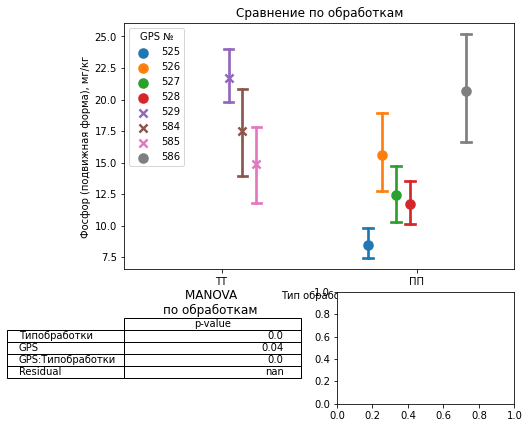

In [41]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/фосфор_рельеф.jpg')


In [42]:
stats

Фосфор (подвижная форма), мг/кг                    
                                 mean variation       std
GPS №                                                    
525                          8.506837  0.229308  2.056204
526                         15.582923  0.337763  5.548041
527                         12.430213  0.299306  3.921683
528                         11.691297  0.239428  2.950643
529                         21.740558  0.152689  3.499117
584                         17.500000  0.333168  6.145821
585                         14.885714  0.276272  4.442007
586                         20.700000  0.323470  7.058014

## Калий (подвижная форма), млн-1
### По обработкам

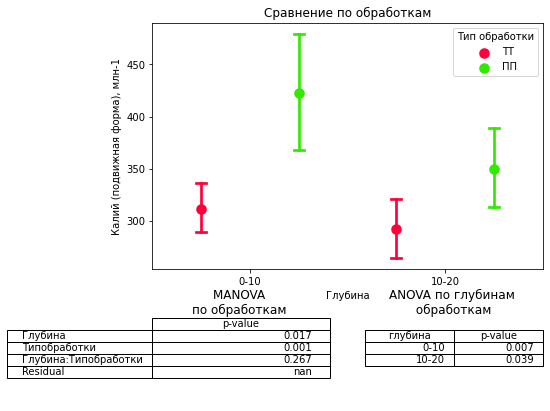

In [43]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/калий_обработки.jpg')


In [44]:
stats

Калий (подвижная форма), млн-1                      
                                                mean variation         std
Тип обработки Глубина                                                     
ПП            0-10                        422.846028  0.383640  164.735828
              10-20                       349.779999  0.315694  112.135714
ТТ            0-10                        311.092648  0.165167   52.871964
              10-20                       291.527019  0.238275   71.178987

### По формам рельефа

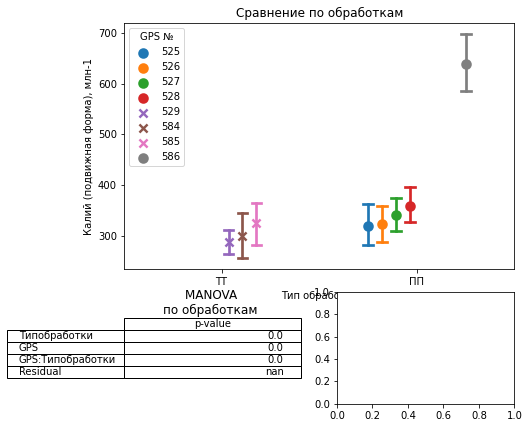

In [45]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/калий_рельеф.jpg')


In [46]:
stats

Калий (подвижная форма), млн-1                     
                                mean variation        std
GPS №                                                    
525                       319.943736  0.211378  71.287356
526                       323.416072  0.185858  63.360780
527                       340.722368  0.154885  55.627444
528                       359.023168  0.159756  60.458793
529                       287.566731  0.135311  41.015741
584                       299.809966  0.246172  77.797000
585                       325.806872  0.171323  60.290565
586                       638.825544  0.145884  98.235714

## Общий азот, %
### По обработкам

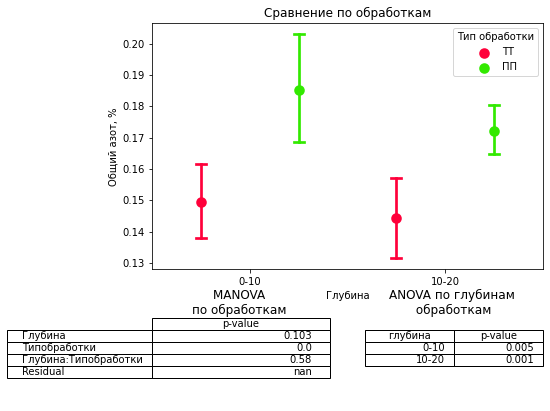

In [47]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/азот_обработки.jpg')


In [48]:
stats

Общий азот, %                    
                               mean variation       std
Тип обработки Глубина                                  
ПП            0-10         0.185152  0.254762  0.047901
              10-20        0.172121  0.146392  0.025588
ТТ            0-10         0.149444  0.172011  0.026451
              10-20        0.144286  0.202426  0.029928

### По формам рельефа

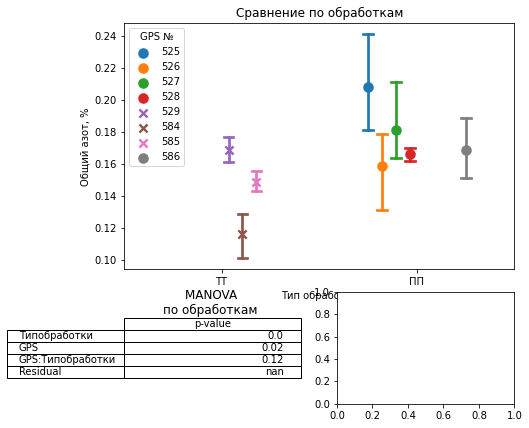

In [49]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 1)
stats

fig.savefig('рисунки/агрохимия/азот_рельеф.jpg')


In [50]:
stats

Общий азот, %                    
               mean variation       std
GPS №                                  
525        0.208000  0.247771  0.054324
526        0.159000  0.252279  0.042282
527        0.181000  0.225709  0.043063
528        0.166000  0.039959  0.006992
529        0.169000  0.072228  0.012867
584        0.116000  0.193534  0.023664
585        0.148571  0.056067  0.008997
586        0.169000  0.186085  0.033149

## Органический углерод, %
### По обработкам

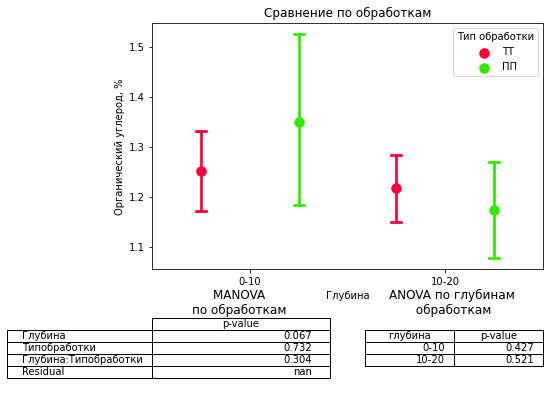

In [51]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/углерод_обработки.jpg')


In [52]:
stats

Органический углерод, %                    
                                         mean variation       std
Тип обработки Глубина                                            
ПП            0-10                   1.350852  0.369577  0.506985
              10-20                  1.173987  0.240996  0.287312
ТТ            0-10                   1.251465  0.139736  0.179945
              10-20                  1.218601  0.132179  0.165052

### По формам рельефа

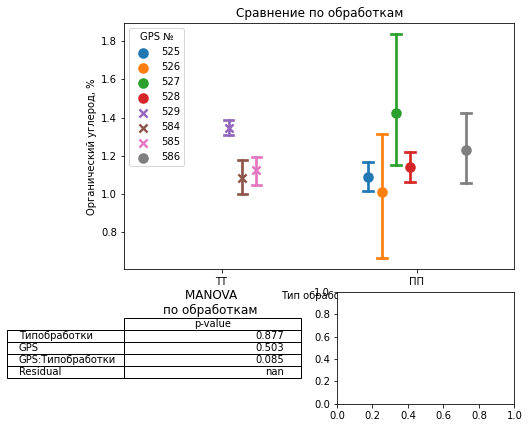

In [53]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = by_points, type_ = "GPS №", agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 1)
stats
fig.savefig('рисунки/агрохимия/углерод_рельеф.jpg')


In [54]:
stats

Органический углерод, %                    
                         mean variation       std
GPS №                                            
525                  1.088916  0.115482  0.132552
526                  1.009940  0.519433  0.552973
527                  1.421380  0.423976  0.635229
528                  1.140270  0.119325  0.143423
529                  1.347530  0.047811  0.067912
584                  1.083720  0.131162  0.149831
585                  1.122914  0.086507  0.104923
586                  1.232580  0.244641  0.317850